In [1]:
from pathlib import Path

import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import time

In [2]:
DATA_PATH = Path("../data")
MODEL_PATH = Path("../exp/weights.pt")

In [3]:

# Load the trained model
if torch.cuda.is_available():
    model = torch.load(MODEL_PATH)
else:
    model = torch.load(MODEL_PATH, map_location=torch.device('cpu'))
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# Set the model to evaluate mode
model.eval()

cuda:0


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


--- preprocess time: 0.0003132820129394531 seconds ---
--- inference time: 0.01795792579650879 seconds ---


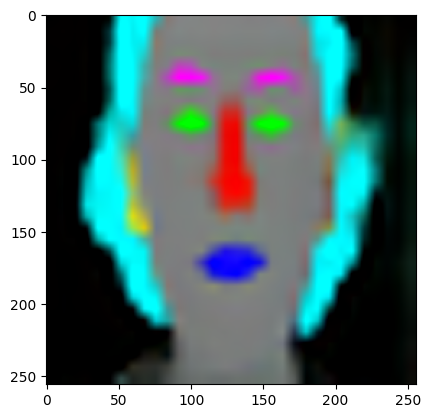

In [6]:
#image_path = DATA_PATH / "samples/female/female03_blackhair_browneyes_env08/headrende0002.png"
#image_path = DATA_PATH / "samples/multiperson/multiperson_env03/headrende0119.png"
image_path = DATA_PATH / "external/_127471632_vauxhallbridgewoman.jpg"
#image_path = DATA_PATH / "external/1920_stock-photo-mosaic-of-satisfied-people-157248584.jpg"
#image_path = DATA_PATH / "external/YoungPeopleBusinessMeeting_1200x627.webp"


# Read  a sample image and mask from the data-set
originalImage = cv2.imread(str(image_path))

# Resize image
start_time = time.time()
img = cv2.resize(originalImage, (256, 256), cv2.INTER_AREA).transpose(2,0,1)
img = img.reshape(1, 3, img.shape[1],img.shape[2])
print("--- preprocess time: %s seconds ---" % (time.time() - start_time))

start_time = time.time()
with torch.no_grad():
    if torch.cuda.is_available():
    	a = model(torch.from_numpy(img).to(device).type(torch.cuda.FloatTensor)/255)
    else:
        a = model(torch.from_numpy(img).to(device).type(torch.FloatTensor)/255)
print("--- inference time: %s seconds ---" % (time.time() - start_time))

outImage = a['out'].cpu().detach().numpy()[0]
plt.imshow(outImage.transpose(1,2,0))